# **Imports**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
from sklearn.model_selection import GridSearchCV
from scipy import stats

# **Dataset loading**

In [3]:
# Step 1: Load and Explore the Dataset
print("Step 1: Loading and Exploring the Iris Dataset")
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for easier exploration
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = [target_names[i] for i in y]

# Print the first few rows
print("\nFirst 5 rows of the dataset:")
print(iris_df.head())

# Check basic statistics
print("\nBasic statistics:")
print(iris_df.describe())

# Check for missing values
print("\nMissing values check:")
print(iris_df.isnull().sum())

Step 1: Loading and Exploring the Iris Dataset

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Basic statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000        

# **Checking for Duplicates**

In [4]:
# Check for duplicate rows
print("\nChecking for duplicate rows:")
duplicates = iris_df.duplicated()
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("Duplicate rows:")
    print(iris_df[duplicates])
    
    # Remove duplicates and keep first occurrence
    iris_df = iris_df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {iris_df.shape}")
    
    # Update X and y after removing duplicates
    X = iris_df.iloc[:, :-1].values
    y = np.array([list(target_names).index(species) for species in iris_df['species']])
else:
    print("No duplicates found in the dataset.")


Checking for duplicate rows:
Number of duplicate rows: 1
Duplicate rows:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   

       species  
142  virginica  
Dataset shape after removing duplicates: (149, 5)


# **Visualizing**


Step 2: Data Preprocessing and Exploration
Feature distributions saved as 'feature_distributions.png'
Box plots saved as 'boxplots_outliers.png'


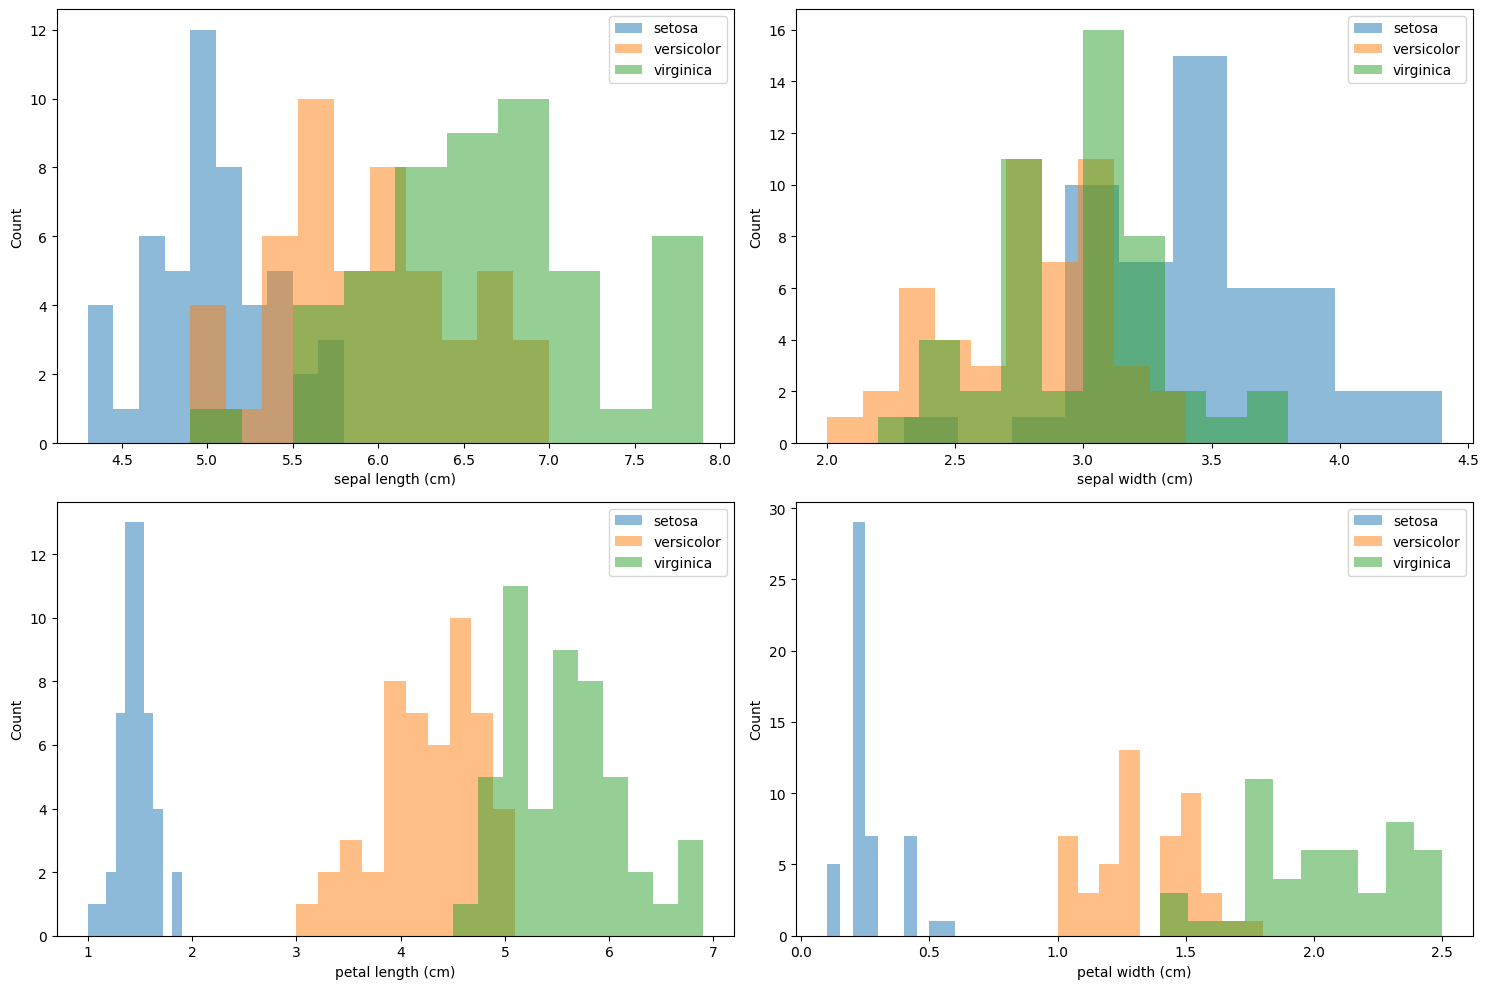

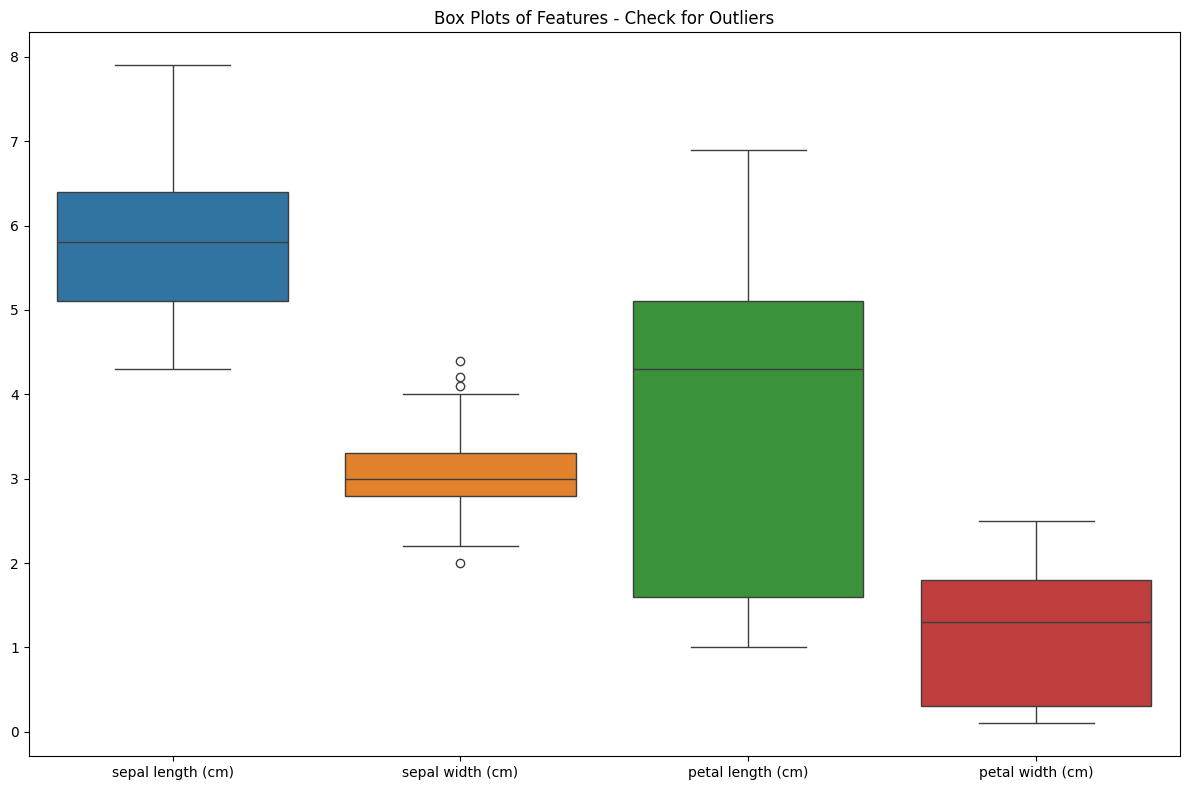

In [5]:
# Step 2: Data Preprocessing and Exploration
print("\nStep 2: Data Preprocessing and Exploration")

# 2.1: Visualize the data distribution
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    for species in range(3):
        plt.hist(X[y == species, i], bins=10, alpha=0.5, label=target_names[species])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
plt.tight_layout()
print("Feature distributions saved as 'feature_distributions.png'")

# 2.2: Box plots to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=iris_df.iloc[:, :-1])
plt.title('Box Plots of Features - Check for Outliers')
plt.tight_layout()
print("Box plots saved as 'boxplots_outliers.png'")

# **Outlier detection and correlation analysis**

In [ ]:
# 2.3: Outlier Detection using Z-score
print("\nOutlier Detection using Z-score method:")
z_scores = stats.zscore(iris_df.iloc[:, :-1])
abs_z_scores = np.abs(z_scores)
outlier_indices = np.where(abs_z_scores > 3)[0]
print(f"Number of outliers detected: {len(np.unique(outlier_indices))}")
if len(outlier_indices) > 0:
    print("Outlier indices:", np.unique(outlier_indices))
    print("Outlier values:")
    print(iris_df.iloc[np.unique(outlier_indices)])

# 2.4: Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = iris_df.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
print("Correlation matrix saved as 'correlation_matrix.png'")